# Getting Data

In [1]:
! ls ../../dsc-phase-1-project-v2-4/zippedData/im.db.zip

../../dsc-phase-1-project-v2-4/zippedData/im.db.zip


In [2]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import zipfile
import numpy as np
import matplotlib.lines as lines

In [3]:
budgets_df = pd.read_csv("../../dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv.gz", parse_dates=["release_date"])
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495"
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0


In [4]:
tmdb_df = pd.read_csv("../../dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv.gz", parse_dates=["release_date"])
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [5]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


In [6]:
rt_rev_df = pd.read_csv("../../dsc-phase-1-project-v2-4/zippedData/rt.reviews.tsv.gz", sep="\t", encoding="ISO-8859-1")
rt_rev_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [7]:
movie_info_df = pd.read_csv("../../dsc-phase-1-project-v2-4/zippedData/rt.movie_info.tsv.gz", sep="\t")
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [8]:
movie_gross_df = pd.read_csv("../../dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz")
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
genre_id = {
    "Action" : 28,
    "Adventure" : 12,
    "Animation" : 16,
    "Comedy" : 35,
    "Crime" : 80,
    "Documentary" : 99,
    "Drama" : 18,
    "Family" : 10751,
    "Fantasy" : 14,
    "History" : 36,
    "Horror" : 27,
    "Music" : 10402,
    "Mystery" : 9648,
    "Romance" : 10749,
    "Science Fiction" : 878,
    "TV Movie" : 10770,
    "Thriller" : 53,
    "War" : 10752,
    "Western" : 37,
}


In [10]:
genre_id = {str(y):str(x) for x,y in genre_id.items()}

# Clean


In [11]:
tmdb_df_clean = tmdb_df.copy()

In [12]:
tmdb_df_clean["genre_ids"] = tmdb_df["genre_ids"].str.replace("]","").str.replace("[","").str.replace(",","").str.split(" ")

In [13]:
tmdb_df_clean

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [14]:
tmdb_df_clean.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [15]:
tmdb_df_clean = tmdb_df_clean.loc[tmdb_df_clean["vote_count"] >= 1000]

In [16]:
tmdb_df_clean.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,12391.898917,197302.502708,16.712528,6.694856,3622.119134
std,7695.060107,139617.270072,8.066124,0.767238,3080.641080
min,0.000000,62.000000,0.600000,4.100000,1000.000000
25%,5252.750000,64670.250000,11.570500,6.175000,1501.750000
50%,11316.000000,188544.000000,14.750000,6.700000,2477.000000
75%,20617.250000,318863.750000,19.131250,7.225000,4426.500000
max,24268.000000,569547.000000,80.773000,8.600000,22186.000000


In [17]:
tmdb_df_clean_avg = tmdb_df_clean.explode(column="genre_ids").groupby("genre_ids").mean().reset_index().drop(columns=["Unnamed: 0", "id"])

In [18]:
tmdb_df_clean_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre_ids     18 non-null     object 
 1   popularity    18 non-null     float64
 2   vote_average  18 non-null     float64
 3   vote_count    18 non-null     float64
dtypes: float64(3), object(1)
memory usage: 704.0+ bytes


In [19]:
genre_id

{'28': 'Action',
 '12': 'Adventure',
 '16': 'Animation',
 '35': 'Comedy',
 '80': 'Crime',
 '99': 'Documentary',
 '18': 'Drama',
 '10751': 'Family',
 '14': 'Fantasy',
 '36': 'History',
 '27': 'Horror',
 '10402': 'Music',
 '9648': 'Mystery',
 '10749': 'Romance',
 '878': 'Science Fiction',
 '10770': 'TV Movie',
 '53': 'Thriller',
 '10752': 'War',
 '37': 'Western'}

In [20]:
tmdb_df_clean_avg["genre_ids"] = tmdb_df_clean_avg["genre_ids"].map(genre_id)

In [21]:
tmdb_df_clean_avg

,genre_ids,popularity,vote_average,vote_count
0,Music,16.100850,7.125000,2675.650000
1,Romance,13.902675,6.871250,2902.668750
2,Family,18.536241,6.851880,4202.834586
3,War,20.310125,7.116667,4630.333333
4,TV Movie,13.515500,6.900000,1511.000000
5,Adventure,21.199918,6.585106,5477.684397
6,Fantasy,20.450343,6.525143,4701.502857
7,Animation,18.970178,7.055446,4112.396040
8,Drama,14.855374,6.987029,3171.836820
9,Horror,14.509191,6.211450,2524.389313


In [22]:
tmdb_df_clean_weighted_avg = tmdb_df_clean.explode(column="genre_ids")
tmdb_df_clean_weighted_avg

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
...,...,...,...,...,...,...,...,...,...,...
24169,24169,18,339877,en,Loving Vincent,10.025,2017-09-22,Loving Vincent,8.2,1200
24169,24169,9648,339877,en,Loving Vincent,10.025,2017-09-22,Loving Vincent,8.2,1200
24231,24231,18,538362,it,Sulla mia pelle,9.161,2018-09-12,On My Skin,8.2,1078
24268,24268,14,490,sv,Det sjunde inseglet,8.693,1958-10-13,The Seventh Seal,8.2,1163


In [23]:
weighted_mean = lambda x: np.average(x, weights=tmdb_df_clean.loc[x.index, "vote_count"])

weighted_avg = tmdb_df_clean.explode(column="genre_ids").groupby("genre_ids").agg(
    sum_vote_count=("vote_count", "sum"), 
    vote_weighted_mean=("vote_average", weighted_mean)).reset_index()

In [24]:
weighted_avg["genre_ids"] = weighted_avg["genre_ids"].map(genre_id)


In [25]:

weighted_avg["count/vote_score"] = (weighted_avg["sum_vote_count"]/1000000) * weighted_avg["vote_weighted_mean"]


In [26]:
top = weighted_avg.sort_values("count/vote_score", ascending = False)

In [27]:
m1 = budgets_df.copy()

In [28]:
m1["title"] = budgets_df["movie"]


In [29]:
m1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0,Red 11
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495",Following
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338",Return to the Land of Wonders
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0,A Plague So Pleasant


In [30]:
m1 = m1.drop(columns=["id", "domestic_gross", "worldwide_gross", "movie"])

In [31]:
gm_df = tmdb_df_clean.merge(m1, how="inner")

In [32]:
gm_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"$165,000,000"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"$170,000,000"
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"$30,000,000"
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"$30,000,000"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"$160,000,000"
...,...,...,...,...,...,...,...,...,...,...,...
732,23959,"[9648, 27, 53]",406563,en,Insidious: The Last Key,16.017,2018-01-05,Insidious: The Last Key,6.1,1306,"$10,000,000"
733,23970,"[35, 18, 10749]",449176,en,"Love, Simon",15.608,2018-03-16,"Love, Simon",8.2,3165,"$10,000,000"
734,23999,"[53, 27]",460019,en,Truth or Dare,14.354,2018-04-13,Truth or Dare,6.0,2005,"$3,500,000"
735,24032,"[10752, 18, 36, 28]",429351,en,12 Strong,13.183,2018-01-19,12 Strong,5.6,1312,"$35,000,000"


In [33]:
gm_df[gm_df['production_budget'].isna()]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget


In [34]:
gm_df = gm_df.drop(columns=["Unnamed: 0", "id", "original_language", "original_title", "popularity", "release_date", "title"])

In [35]:
gm_genre_df = gm_df.explode("genre_ids")

In [36]:
gm_genre_df["genre_ids"] = gm_genre_df["genre_ids"].map(genre_id)

In [37]:
gm_genre_df["production_budget"] = gm_genre_df["production_budget"].str.replace("$","").str.replace(",","")

In [38]:
gm_genre_df["production_budget"] = gm_genre_df["production_budget"].astype(int)

In [39]:
gm_genre_df

,genre_ids,vote_average,vote_count,production_budget
0,Fantasy,7.7,7610,165000000
0,Adventure,7.7,7610,165000000
0,Animation,7.7,7610,165000000
0,Family,7.7,7610,165000000
1,Adventure,6.8,12368,170000000
...,...,...,...,...
735,Action,5.6,1312,35000000
736,Adventure,5.0,1073,103000000
736,Science Fiction,5.0,1073,103000000
736,Family,5.0,1073,103000000


In [40]:



gm_genre_avg = gm_genre_df.groupby("genre_ids").mean().reset_index()

In [41]:
top_gm_genre_avg = gm_genre_avg.sort_values("production_budget", ascending = False)

In [42]:
top_gm_genre_avg

,genre_ids,vote_average,vote_count,production_budget
1,Adventure,6.593458,5704.154206,1.354542e+08
7,Fantasy,6.443902,5025.764228,1.263805e+08
6,Family,6.772165,4250.845361,1.165979e+08
13,Science Fiction,6.557447,6038.070922,1.140340e+08
2,Animation,6.883333,4391.500000,1.138788e+08
0,Action,6.470330,4892.395604,1.098103e+08
15,War,7.013333,4772.600000,7.933333e+07
16,Western,7.166667,7306.222222,7.677778e+07
3,Comedy,6.543946,3307.394619,6.154843e+07
4,Crime,6.635780,3388.981651,5.266147e+07


In [64]:
lis = [25000000, 50000000, 75000000, 125000000, 150000000, 175000000, 225000000, 250000000, 275000000, 325000000, 350000000, 375000000, 425000000]

In [85]:
las = ["-$100 Million","$0", "$100 Million", "$200 Million", "$300 Million", "$400 Million"]

In [93]:
los = ["$0", "$20 Million", "$40 Million", "$60 Million", "$80 Million", "$100 Million", "$120 Million", "$140 Million"]

In [110]:
['$' + str(num) for num in range(0,160,20)]

['$0', '$20', '$40', '$60', '$80', '$100', '$120', '$140']

# FIGS

(6.0, 7.5)

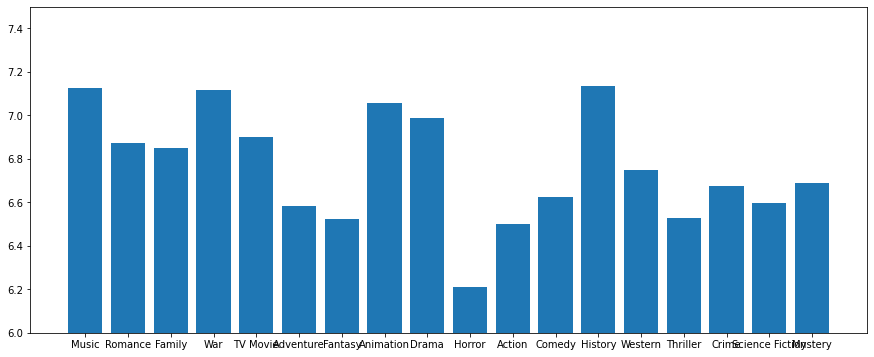

In [43]:
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x=tmdb_df_clean_avg["genre_ids"], height=tmdb_df_clean_avg["vote_average"])
ax.set_ylim(6,7.5)

Weighted average

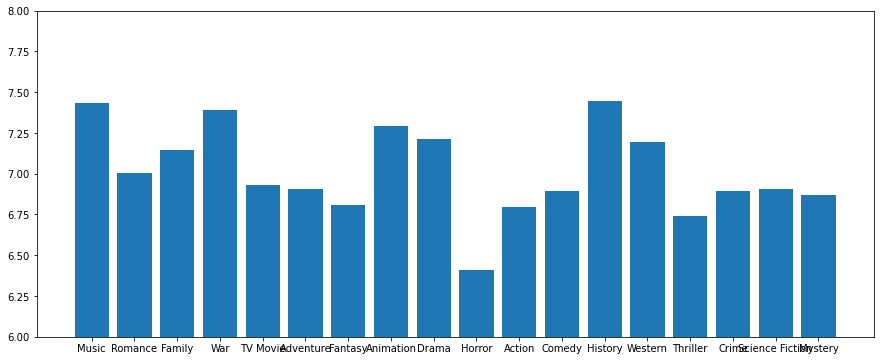

In [44]:
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x=weighted_avg["genre_ids"], height=weighted_avg["vote_weighted_mean"])
ax.set_ylim(6,8);

In [49]:
!cd Graphs/


Graphs
Untitled.ipynb


In [129]:
[palet(2) if score > 6 else '#d62828' for score in top['count/vote_score']]

[(0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0),
 '#d62828',
 '#d62828',
 '#d62828',
 '#d62828',
 '#d62828',
 '#d62828',
 '#d62828',
 '#d62828',
 '#d62828',
 '#d62828',
 '#d62828',
 '#d62828']

''

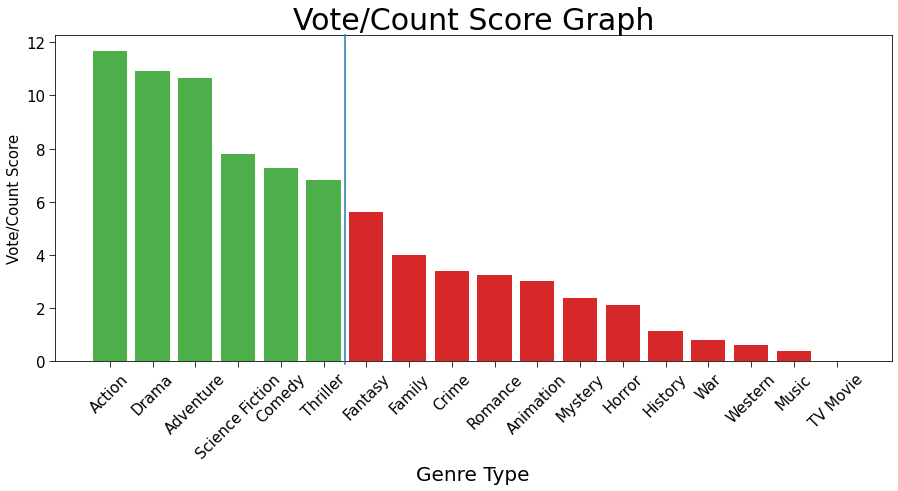

In [151]:
fig, ax = plt.subplots(figsize=(15,6))
palet =plt.get_cmap("Set1")
ax.bar(x=top["genre_ids"], height=top["count/vote_score"], color=[palet(2) if score > 6 else '#d62828' for score in top['count/vote_score']])

ax.set_xlabel("Genre Type", fontsize=20)
ax.set_ylabel("Vote/Count Score", fontsize=15)
ax.set_title("Vote/Count Score Graph", fontsize=30)
fig.add_artist(lines.Line2D([.3935, .3935], [.12, .88]))
plt.xticks(rotation=45)
ax.tick_params(length=6, which="both", labelsize=15)
plt.savefig("Graphs/VoteCountScore.png", bbox_inches="tight")
;

In [ ]:
[palet(2),"#d62828","#d62828",palet(2),"#d62828",palet(2),"#d62828","#d62828",palet(2),"#d62828",palet(2),"#d62828",palet(2),"#d62828","#d62828","#d62828","#d62828","#d62828"]

<ipython-input-152-97d1db581610>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(los, minor=False)


''

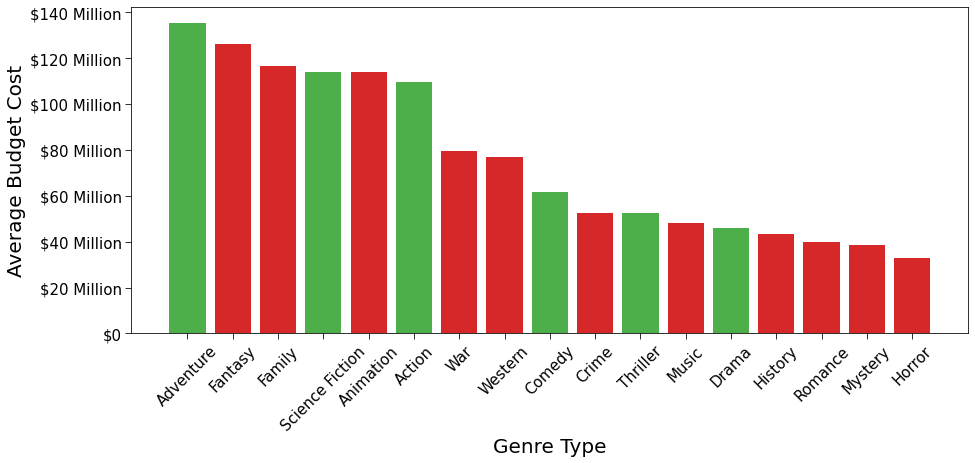

In [152]:
fig, ax = plt.subplots(figsize=(15,6))
palet =plt.get_cmap("Set1")
ax.bar(x=top_gm_genre_avg["genre_ids"], height=top_gm_genre_avg["production_budget"], color=[palet(2),"#d62828","#d62828",palet(2),"#d62828",palet(2),"#d62828","#d62828",palet(2),"#d62828",palet(2),"#d62828",palet(2),"#d62828","#d62828","#d62828","#d62828","#d62828"])

ax.set_xlabel("Genre Type", fontsize=20)
ax.set_ylabel("Average Budget Cost", fontsize=20)
# ax.set_title("Average Budget Cost per Genre", fontsize=30)
ax.set_yticklabels(los, minor=False)
plt.xticks(rotation=45)
ax.tick_params(length=6, which="both", labelsize=15)
plt.savefig("Graphs/BudgetCostperGenre", bbox_inches="tight")
;

<ipython-input-150-d11285bf3b16>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(las, minor=False)


''

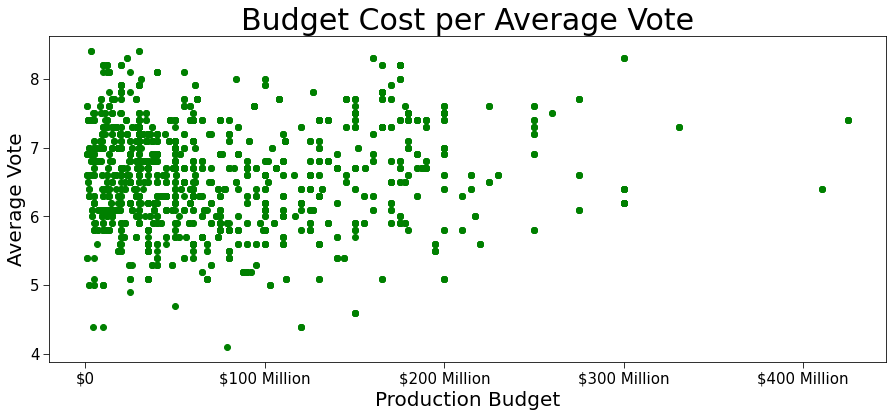

In [150]:
fig, ax = plt.subplots(figsize=(15,6))
palet =plt.get_cmap("Set1")
ax.scatter(y=gm_genre_df["vote_average"], x=gm_genre_df["production_budget"], color = "green")

ax.set_xlabel("Production Budget", fontsize=20)
ax.set_ylabel("Average Vote", fontsize=20)
ax.set_title("Budget Cost per Average Vote", fontsize=30)
ax.set_xticklabels(las, minor=False)
# ax.set_xticks(lis, minor=True)
# ax.set_xticklabels(lis, minor=True)
ax.tick_params(length=6, which="both", labelsize=15)
plt.savefig("Graphs/BudgetCostperAverage")
;